In [2]:
from pathlib import Path
import os
from os import listdir
from os.path import isfile, join
from scipy.io.wavfile import read
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi, sqrt, exp
import scipy
import librosa
import librosa.display
plt.style.use('seaborn-poster')
%matplotlib inline

In [3]:
root_dir = Path(os.getcwd())
wav_path = root_dir/'wav_database'

In [142]:
sample_word = 'off'

In [143]:
wav_samples = [wav_path/sample_word/f for f in listdir(wav_path/sample_word) if isfile(join(wav_path/sample_word, f))]

In [144]:
wav_samples

[WindowsPath('C:/Users/hydsu/OneDrive/Desktop/Praat/wav_database/off/004ae714_nohash_0.wav'),
 WindowsPath('C:/Users/hydsu/OneDrive/Desktop/Praat/wav_database/off/004ae714_nohash_1.wav'),
 WindowsPath('C:/Users/hydsu/OneDrive/Desktop/Praat/wav_database/off/00b01445_nohash_0.wav'),
 WindowsPath('C:/Users/hydsu/OneDrive/Desktop/Praat/wav_database/off/01b4757a_nohash_0.wav'),
 WindowsPath('C:/Users/hydsu/OneDrive/Desktop/Praat/wav_database/off/01bb6a2a_nohash_0.wav'),
 WindowsPath('C:/Users/hydsu/OneDrive/Desktop/Praat/wav_database/off/01bb6a2a_nohash_1.wav'),
 WindowsPath('C:/Users/hydsu/OneDrive/Desktop/Praat/wav_database/off/01bb6a2a_nohash_2.wav'),
 WindowsPath('C:/Users/hydsu/OneDrive/Desktop/Praat/wav_database/off/01bcfc0c_nohash_0.wav'),
 WindowsPath('C:/Users/hydsu/OneDrive/Desktop/Praat/wav_database/off/01d22d03_nohash_0.wav'),
 WindowsPath('C:/Users/hydsu/OneDrive/Desktop/Praat/wav_database/off/02ade946_nohash_0.wav'),
 WindowsPath('C:/Users/hydsu/OneDrive/Desktop/Praat/wav_data

In [145]:
sample_no = 0
curr_wav = read(wav_samples[sample_no])[1]
print(len(curr_wav))

14118


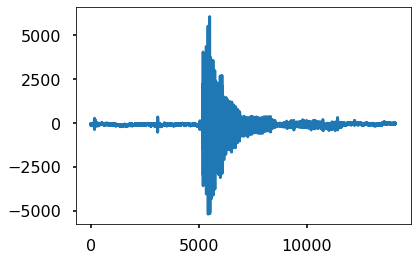

In [146]:
plt.plot(curr_wav)

speechcommands data is sampled at 16 kHz -> 62.5 us. Total length of audio recording is 1s.

Original Praat shape of broadband -> 256 x 991, narrowband -> 512 x 445

Compute short-term spectral analysis: Compute a spectrum of a discrete set of time points in the audio signal.

Spectrogram Parameters:
- Window Length (s): (broadband: 0.005, narrowband: 0.03) Duration of analysis window, affects bandwidth of signal.
    - Given 62.5 us between each sample, to get a 0.005 s window, we take 80 samples. For 0.03 s window -> 480 samples.
- Max Freq (Hz): (broadband & narrowband: 8000 kHz) Highest frequency we want to see. Don't make this more than 2x sample frequency.
- Time Step (s): (broadband & narrowband: 0.01 s) 
    - For a time step of 0.001 s, we move forward by 16 samples per window.
- Frequency Step (Hz): (broadband & narrowband: 20 Hz) 

# Librosa Version

In [134]:
# n_fft = 2048 # 80 samples
# hop_length = 160 # 160 samples or 16 samples
# stft = librosa.stft(curr_wav/1.0, n_fft=n_fft, hop_length=hop_length)
# abs_stft = np.abs(stft) # converts complex to real
# print(abs_stft.shape)

# fig, ax = plt.subplots(figsize=(9,5))
# librosa.display.specshow(
#     librosa.amplitude_to_db(abs_stft, ref=np.max),
#     y_axis="hz", x_axis="time", ax=ax, fmax=8000)
# plt.ylabel("Frequency (Hz)")
# plt.xlabel("Time (s)")
# plt.ylim([0,8000])

# DFT Demonstration

In [135]:
# # sampling rate
# sr = 100
# # sampling interval
# ts = 1.0/sr
# t = np.arange(0,1,ts)

# freq = 1.
# x = 3*np.sin(2*np.pi*freq*t)

# freq = 4
# x += np.sin(2*np.pi*freq*t)

# freq = 7   
# x += 0.5* np.sin(2*np.pi*freq*t)

# plt.figure(figsize = (8, 6))
# plt.plot(t, x, 'r')
# plt.ylabel('Amplitude')

# plt.show()

In [136]:
# def DFT(x):
#     """
#     x: 1D real-valued signal as a list
#     """

#     N = len(x)
#     n = np.arange(N)
#     k = n.reshape((N, 1))
#     e = np.exp(-2j * np.pi * k * n / N)
    
#     X = np.dot(e, x)
    
#     return X

In [137]:
# X = DFT(x)

# # calculate the frequency
# N = len(X)
# n = np.arange(N)
# T = N/sr
# freq = n/T 

# plt.figure(figsize = (8, 6))
# plt.stem(freq, abs(X), 'b', \
#          markerfmt=" ", basefmt="-b")
# plt.xlabel('Freq (Hz)')
# plt.ylabel('DFT Amplitude |X(freq)|')
# plt.show()

# The Real Deal

In [149]:
window_size = 80 # 80 samples per window. 16 kHz sample rate -> 5 ms window 
time_step = 16 # Move forward 16 samples per window.
num_padding = 480 # Amount to pad by, in number of samples. Total samples = num_padding + window_size
windows = []
spectrums = []

i = 0
while (i*time_step+window_size < len(curr_wav)):
    curr_window = curr_wav[i*time_step:i*time_step+window_size]
    if len(curr_window) != window_size: # pad the last few windows that are clipped at the end
        curr_window = np.concatenate([curr_window, np.array([0]*(window_size-len(curr_window)))])
    windows.append(curr_window)
    i += 1
        
for w in windows:
    window_kernel = np.hamming(window_size) # experiment with other kernels like Gaussian and Hann
    windowed = w * window_kernel
    padded = np.concatenate([windowed, np.array([0]*num_padding)])
    spectrum = abs(DFT(padded))
    spectrum = spectrum[0:len(spectrum)//2]
    spectrum = np.log(spectrum + 0.00001)
    spectrums.append(spectrum)
    
spectrums = np.vstack(spectrums)
spectrums = list(map(list, zip(*spectrums)))[::-1]

Text(0, 0.5, 'Hz')

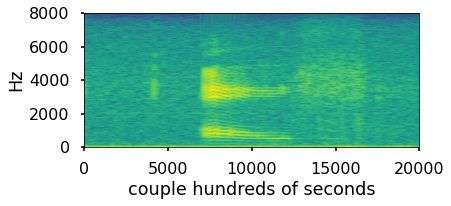

In [150]:
plt.imshow(spectrums, extent=[0, 20000, 0, 8000])
plt.xlabel("couple hundreds of seconds")
plt.ylabel("Hz")

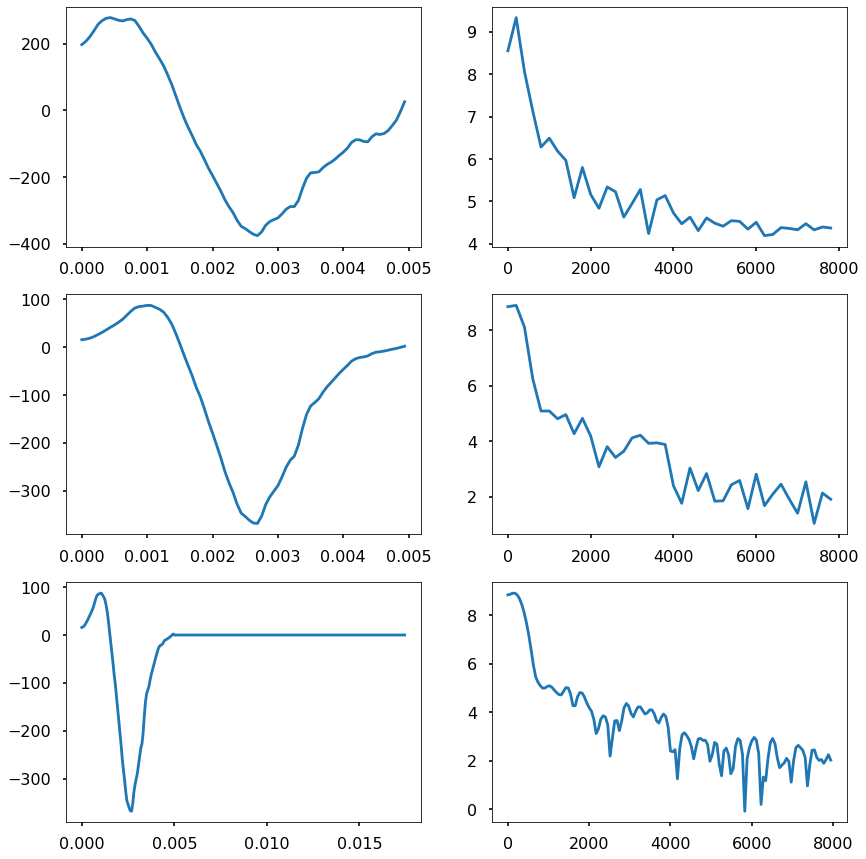

In [128]:
nrows = 3
ncols = 2
figure, ax = plt.subplots(nrows, ncols, figsize=(14,15))

# ----- Time domain of original window ----- #
sr = 16000 # 16 KHz
ts = 1.0/sr
t = np.arange(0,ts*window_size,ts)
x = windows[85]

ax[0,0].plot(t, x)

# ----- Freq. response of original window ----- #
X = DFT(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

ax[0,1].plot(freq[0:len(freq)//2], np.log(abs(X)[0:len(X)//2])) # // 2 to only plot below Nyquist

# ----- Time domain after windowing ----- #
x_windowed = x * np.hamming(80)
ax[1,0].plot(t, x_windowed)

# ----- Freq. response of windowed window ----- #
X_windowed = DFT(x_windowed)
ax[1,1].plot(freq[0:len(freq)//2], np.log(abs(X_windowed)[0:len(X_windowed)//2])) # // 2 to only plot below Nyquist

# ----- Zero-pad signal to increase freq. resolution ----- #
num_padding = 200
x_padded = np.concatenate([x_windowed, np.array([0]*num_padding)])
t_padded = np.arange(0, ts*(window_size+num_padding), ts)
ax[2,0].plot(t_padded, x_padded)

# ----- Freq. response of padded window ----- #
X_padded = DFT(x_padded)
N_padded = len(X_padded)
n_padded = np.arange(N_padded)
T_padded = N_padded/sr
freq_padded = n_padded/T_padded
ax[2,1].plot(freq_padded[0:len(freq_padded)//2], np.log(abs(X_padded)[0:len(X_padded)//2])) # // 2 to only plot below Nyquist